# Shortest city tour

This notebooks introduces an algorithmic challenge which consists in finding the shortest path through a set of streets. It gives examples and functions to test a solution.

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use("ggplot")

In [2]:
from jyquickhelper import add_notebook_menu
add_notebook_menu()

## Problem definition

In [3]:
from ensae_projects.datainc.data_geo_streets import get_seattle_streets, shapely_records
from ensae_projects.datainc.data_geo_streets import seattle_streets_set_small, folium_html_street_map

name = get_seattle_streets()
shapes, records, fields = shapely_records(name)
edges_index, edges, vertices, distances = seattle_streets_set_small(shapes, records)
folium_html_street_map(edges_index, shapes, html_width="80%", zoom_start=15)

<pyensae.notebookhelper.folium_helper.folium_html_map.<locals>.CustomFoliumMap at 0x22bf2f2a6d8>

**Somebody must walk through all the blue streets and only these streets. What is the shortest way?**

Inputs:

* A list of vertices (crossroads).
* A list of edges/streets *(a,b)*: it goes from *vertices[a]* to *vertices[b]*.
* The distances, the distance measure the street length which is longer than the length of the straight line between its extremities.

Outputs:

* a list of edges

We introduce a last array `edges_index` which contains the indices of the streets in Seattle database. A list of edges can be defined by a list of couples *(a,b)* or a list of indices taken from this database. Let's see an example:

In [4]:
vertices

[(-122.34991548199997, 47.46763155800005),
 (-122.34991155699998, 47.468532819000075),
 (-122.349907514, 47.469446668000046),
 (-122.34855159499995, 47.47036031400006),
 (-122.34722154299999, 47.46765986400004),
 (-122.34721743899996, 47.46856001400005),
 (-122.34721337199994, 47.466759281000066),
 (-122.34721334599999, 47.46946425100003),
 (-122.34717558599999, 47.47218021800006),
 (-122.34695634299999, 47.47037913100007),
 (-122.34651954599997, 47.46947199700003),
 (-122.34602084699998, 47.46857181000007),
 (-122.34577976599996, 47.47219822000005),
 (-122.34577761299994, 47.470393184000045),
 (-122.34552556999995, 47.46767758400006),
 (-122.34451462099997, 47.46858890800007),
 (-122.34451260399999, 47.46949338600007),
 (-122.34451061099998, 47.47040481700003)]

In [5]:
edges

[(10, 7),
 (5, 4),
 (4, 0),
 (10, 11),
 (9, 10),
 (7, 2),
 (17, 16),
 (5, 1),
 (11, 5),
 (17, 13),
 (16, 15),
 (14, 4),
 (15, 11),
 (1, 0),
 (4, 6),
 (8, 9),
 (13, 9),
 (7, 5),
 (11, 14),
 (16, 10),
 (2, 1),
 (12, 8),
 (9, 3),
 (12, 13)]

In [6]:
distances

[0.0006938432391730961,
 0.0009001593555190061,
 0.0026940877056109824,
 0.0010290953928001187,
 0.0010111922517731158,
 0.0026942253755745885,
 0.0009114331789785205,
 0.002694255252624058,
 0.001196650141037562,
 0.0012670554031294153,
 0.000904480248963228,
 0.001696065569270049,
 0.0015063230412799549,
 0.0009012695466891699,
 0.0009006200670015617,
 0.0018143819538848289,
 0.0011788137680839225,
 0.0009042462633556375,
 0.0010222227965844966,
 0.0020070559761853316,
 0.0009138579433356185,
 0.001395936081803295,
 0.0015953629752697774,
 0.0018050372840282547]

The last array represents the edges indices related to the whole database describing streets in Seattle. The database is used to compute the length of the streets and their locations. The location is used to draw maps. `edges_index` defines a set of indices of streets in Seattle. **A street is always identified by its index in this database.** They do not change whatever the subset of street is as opposed to the set vertices which is built from this subset of streets.

In [7]:
edges_index

[0,
 4994,
 11394,
 9989,
 1670,
 11274,
 17680,
 3353,
 9118,
 30370,
 15023,
 6712,
 8378,
 29114,
 4553,
 1101,
 6488,
 107,
 1003,
 12783,
 2418,
 2803,
 2808,
 6265]

The array `shapes` defines the streets as a list of segments. They should be needed only to draw maps.

In [8]:
shapes[4994].points

[(-122.34721743899996, 47.46856001400005),
 (-122.34722154299999, 47.46765986400004)]

The array `records` contains informations about each street. It is not needed to find the shortest tour.

In [9]:
{k[0]:v for k, v in zip(fields[1:], records[4994])}

{'F_INTR_ID': 21670,
 'T_INTR_ID': 21711,
 'SND_ID': 37943,
 'SND_FEACOD': 1,
 'CITYCODE': 0,
 'STNAME_ID': 6,
 'ST_CODE': 0,
 'ARTERIAL_C': 0,
 'SEGMENT_TY': 1,
 'AGENCY_COD': 1,
 'ACCESS_COD': 1,
 'DIVIDED_CO': 1,
 'STRUCTURE_': 1,
 'LEGALLOC_C': 1,
 'VEHICLE_US': 1,
 'GIS_SEG_LE': 328.344652,
 'L_ADRS_FRO': 15000,
 'L_ADRS_TO': 15098,
 'R_ADRS_FRO': 15001,
 'R_ADRS_TO': 15099,
 'ORD_PRE_DI': '',
 'ORD_STREET': '10TH',
 'ORD_STRE_1': 'AVE',
 'ORD_SUF_DI': 'SW',
 'ORD_STNAME': '10TH AVE SW',
 'L_CITY': 'BURIEN',
 'L_STATE': 'WA',
 'L_ZIP': '98166',
 'R_CITY': 'BURIEN',
 'R_STATE': 'WA',
 'R_ZIP': '98166',
 'SNDSEG_UPD': datetime.date(2004, 5, 19),
 'COMPKEY': 0,
 'COMPTYPE': 0,
 'UNITID': '0',
 'UNITID2': '0',
 'SHAPE_Leng': 0.000900159355519}

We display a simplified map.

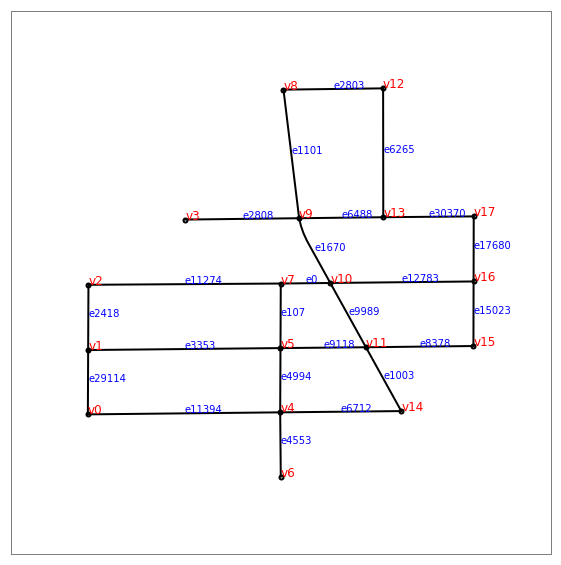

In [10]:
from ensae_projects.datainc.data_geo_streets import plot_streets_network
plot_streets_network(edges_index, edges, vertices, shapes, figsize=(10,10));

## One solution

A solution is a set of indices of edges. Let's try `edges_index` without one edge as a solution.

In [11]:
from ensae_projects.challenge.city_tour import distance_solution
solution = edges_index[:-1].copy()
try:
    distance_solution(edges_index, edges, distances, solution)
except Exception as e:
    print(type(e), str(e))

<class 'ensae_projects.challenge.city_tour.SolutionException'> Different number of distinct edges:
expected=24 got=23
Did you cover all the edges?


The function `distance_solution` detected one edge was not covered. Let's try another one.

In [12]:
solution = edges_index
try:
    distance_solution(edges_index, edges, distances, solution)
except Exception as e:
    print(type(e), str(e))

<class 'ensae_projects.challenge.city_tour.SolutionException'> Are you sure? The path is inconsistent. Some help:
[(1, 3), (3, 1), (6, 1), (7, 3), (13, 3), (16, 3)]


The path is inconsistent. The function could not find a way to go through all of them without jumping. Note that the order of the streets does not have to be specified. The distance is able to tell if somebody can walk through all the street in one go. This means some streets must be present more than one time in the path. Let's try the following solution:

In [13]:
solution = edges_index + [17680, 30370, 12783, 0, 3353, 9118, 8378, 15023]
distance_solution(edges_index, edges, distances, solution)

0.04481876729332677

Let's plot the solution. A function will reorder the streets to go through all of them without jumping. The blue number indicates the position of each street in this path.

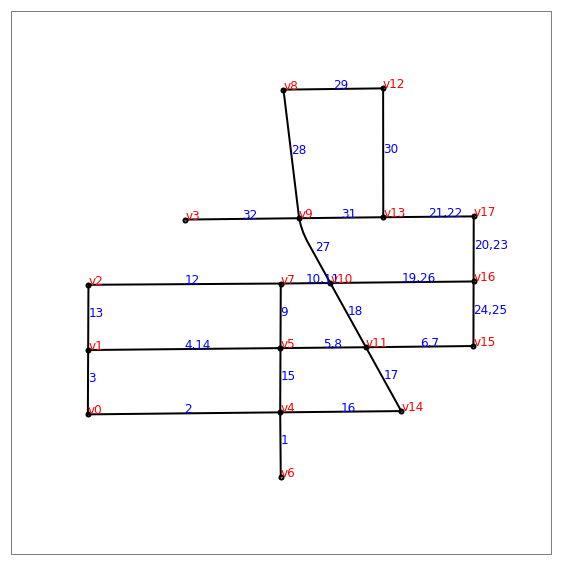

In [14]:
from ensae_projects.challenge.city_tour import euler_path
path = euler_path(edges_index, edges, solution)
plot_streets_network(edges_index, edges, vertices, shapes, order=path, figsize=(10,10));

Now, what is the best path?